In [20]:
%matplotlib inline

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
df = pd.DataFrame({'Condition 1': np.random.rand(20),
                   'Condition 2': np.random.rand(20)*0.9,
                   'Condition 3': np.random.rand(20)*1.1})
df.head()

,Condition 1,Condition 2,Condition 3
0,0.548814,0.880757,0.395459
1,0.715189,0.719243,0.480735
2,0.602763,0.415331,0.767394
3,0.544883,0.702476,0.066248
4,0.423655,0.106447,0.733443


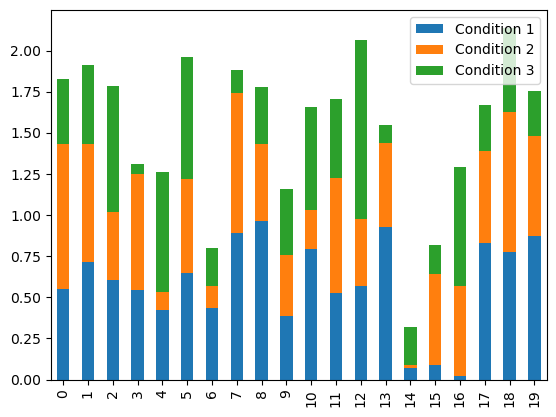

In [22]:
fig,ax = plt.subplots()
df.plot.bar(ax=ax,stacked=True) # ax=ax 是为了将图画在同一个画布上， stacked=True 是为了堆叠柱状图
plt.show()

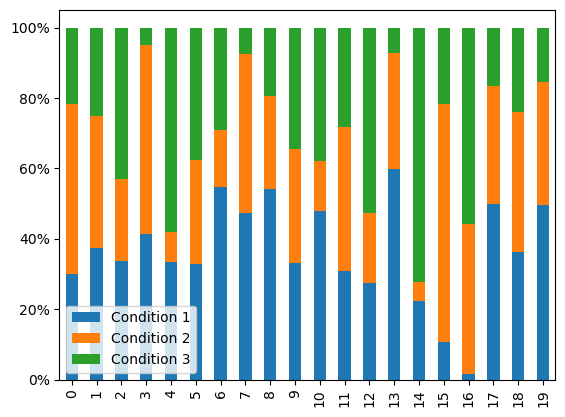

In [23]:
from matplotlib.ticker import FuncFormatter

# 计算每一行的比例
df_ratio = df.div(df.sum(axis=1), axis=0)

# 创建一个新的图形和轴对象
fig, ax = plt.subplots()

# 绘制堆叠柱状图
df_ratio.plot.bar(ax=ax, stacked=True)

# 设置y轴的格式为百分比
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# 显示图形
plt.show()

In [24]:
# 从UCI机器学习库中读取宫颈癌风险因素数据集
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv'

# 使用pandas读取CSV文件，并将缺失值标记为NaN
df = pd.read_csv(url, na_values="?")

# 显示数据集的前五行
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [25]:
from sklearn.impute import SimpleImputer

# 使用SimpleImputer来填补缺失值，默认使用均值填补
imputer = SimpleImputer(strategy='mean')

# 对数据框df进行填补缺失值操作，并将结果转换为DataFrame
impute = pd.DataFrame(imputer.fit_transform(df))

# 保留原始数据框的列名和索引
impute.columns = df.columns
impute.index = df.index

# 显示填补缺失值后的数据框的前五行
impute.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,6.140845,5.816901,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,6.140845,5.816901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

Explained variance:
PC1 59.41%
PC2 14.59%
PC3 9.02%


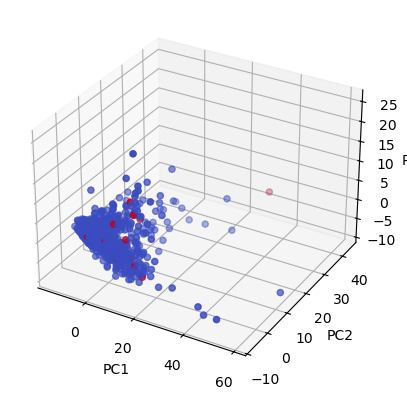

In [28]:
# 删除目标变量 'Dx:Cancer' 列，保留特征变量
features = impute.drop('Dx:Cancer', axis=1)

# 提取目标变量 'Dx:Cancer'
y = impute["Dx:Cancer"]

# 初始化PCA，设置主成分数为3
pca = PCA(n_components=3)

# 对特征变量进行PCA降维
X_r = pca.fit_transform(features)

# 打印每个主成分的解释方差比例
print("Explained variance:\nPC1 {:.2%}\nPC2 {:.2%}\nPC3 {:.2%}"
      .format(pca.explained_variance_ratio_[0],
              pca.explained_variance_ratio_[1],
              pca.explained_variance_ratio_[2]))

# 创建一个新的图形对象
fig = plt.figure()

# 创建3D坐标轴对象
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图，颜色根据目标变量 'Dx:Cancer' 进行区分
ax.scatter(X_r[:, 0], X_r[:, 1], X_r[:, 2], c=y, cmap=plt.cm.coolwarm)

# 设置坐标轴标签
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# 显示图形
plt.show()